# Camelyon

In [1]:
from pathlib import Path
tumor_001_image = Path("/home/user/CAMELYON16/images/tumor_001.tif")
tumor_001_annotation = Path("/home/user/CAMELYON16/annotations/tumor_001.xml")
tumor_001_mask = Path("/home/user/CAMELYON16/masks/tumor_001_mask.tif")

In [2]:
from wholeslidedata.annotation.parser import MaskAnnotationParser
from wholeslidedata.image.wholeslideimage import WholeSlideImage
from wholeslidedata.annotation.wholeslideannotation import WholeSlideAnnotation
from wholeslidedata.interoperability.asap.parser import AsapAnnotationParser
from wholeslidedata.interoperability.asap.backend import AsapWholeSlideImageBackend
from wholeslidedata.annotation.callbacks import TiledAnnotationCallback
from wholeslidedata.visualization.plotting import plot_annotations
from wholeslidedata.interoperabilgeometryity.asap.annotationwriter import write_asap_annotation
from wholeslidedata.annotation.selector import sort_by_label_value
from matplotlib import pyplot as plt
from colour import Color
import numpy as np

In [3]:
tumor_001_wsi = WholeSlideImage(tumor_001_image, backend=AsapWholeSlideImageBackend)
tumor_001_tissue = WholeSlideImage(tumor_001_mask, backend=AsapWholeSlideImageBackend)

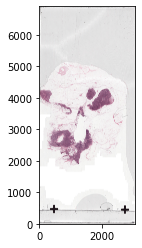

In [4]:
slide_80 = tumor_001_wsi.get_slide(8.0)

plt.imshow(slide_80)
plt.gca().invert_yaxis()
plt.show()

In [5]:
import cv2

In [6]:
#  cv2.COLOR_RGB2HSV

In [7]:
def is_in_color(patch):
    # filter color
    # Convert the input image to the HSV color space
    hsv = cv2.cvtColor(patch, cv2.COLOR_RGB2HSV)

    lower_bound = np.array([120,20,20])
    upper_bound = np.array([310,255,255])

    # Filter the image to select colors that look like red, pink, or purple
    mask = cv2.inRange(hsv, lower_bound, upper_bound)

    # Apply the mask to the input image
    colored_image = cv2.bitwise_and(patch, patch, mask=mask)
    if np.count_nonzero(colored_image) > (patch.shape[0] *patch.shape[1])//2:
        return True
    return False

In [8]:
wsa_tumor = WholeSlideAnnotation(tumor_001_annotation, labels={'tumor': 2})
wsa_tissue = WholeSlideAnnotation(tumor_001_mask, labels={'tissue':1}, parser=MaskAnnotationParser(output_spacing=0.25, shape=(1024*4, 1024*4)))
annotations = []
annotations.extend(wsa_tumor.annotations)
mask_filterd_annotations = []
print(len(wsa_tissue.annotations))
for annotation in wsa_tissue.annotations:
    p = tumor_001_wsi.get_annotation(annotation, spacing=4.0, masked=False)
    if is_in_color(p):
        mask_filterd_annotations.append(annotation)
        annotations.append(annotation)
print(len(mask_filterd_annotations))
write_asap_annotation(annotations, "/home/user/tumor_001_tissue.xml")


444
161


In [9]:
#TODO check image and filter based on color, save new annotation file

In [5]:

# check image and filter based on color, save new annotation file
color_map={'tumor': Color(pick_for='tumor').hex_l, 'tissue': Color(pick_for='tissue').hex_l}

{'tumor': 2, 'tissue': 1}


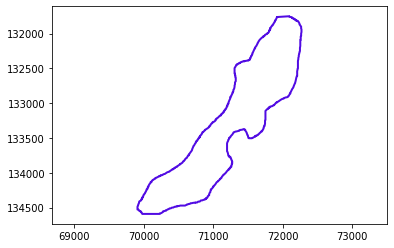

In [6]:
wsa = WholeSlideAnnotation('/home/user/tumor_001_tissue.xml')
print(wsa.labels.map)
# plot_annotations(wsa.annotations)
tumor_annotation = wsa.sampling_annotations_per_label['tumor'][0]
plot_annotations([tumor_annotation], color_map=color_map)

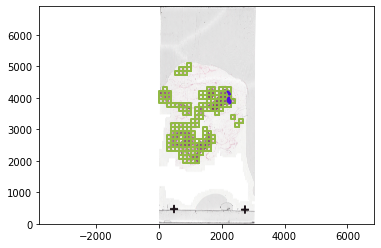

In [7]:
fig, ax = plt.subplots()
ax.imshow(slide_80)
plot_annotations(sort_by_label_value(wsa.annotations), scale=1/32, ax=ax, color_map=color_map)
plt.show()

In [8]:
selected_annotations = wsa.select_annotations(*tumor_annotation.center, *tumor_annotation.size)

In [9]:
patch = tumor_001_wsi.get_region_from_annotations(selected_annotations, 1.0, margin=0)

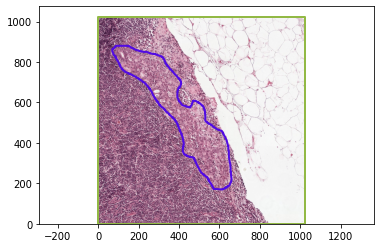

In [10]:
fig, ax = plt.subplots()
ax.imshow(patch)
downsampling = tumor_001_wsi.get_downsampling_from_spacing(1.0)

# !! all annotations are now used as base, should use base for most top,left and other annotations should shift based on the offset
plot_annotations(selected_annotations, ax=ax, scale=1/downsampling, use_base_coordinates=True,color_map=color_map)
plt.show()

In [14]:
selected_annotations

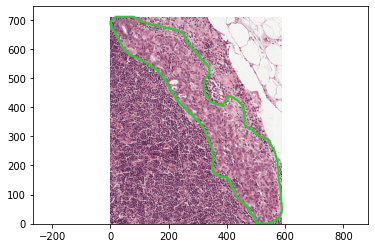

In [22]:
fig, ax = plt.subplots()
ax.imshow(patch)
downsampling = tumor_001_wsi.get_downsampling_from_spacing(1.0)
plot_annotations([wsa.annotations[0]], ax=ax, scale=1/downsampling, use_base_coordinates=True,color_map={'tumor': Color(pick_for='tumor').hex_l})
plt.show()

In [6]:
normal_001_wsi = WholeSlideImage(normal_001_image, backend=AsapWholeSlideImageBackend)

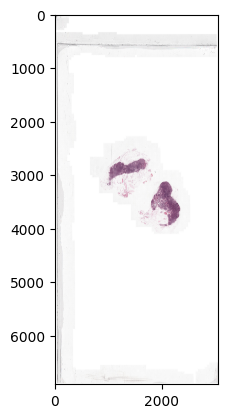

In [10]:
slide_80 = normal_001_wsi.get_slide(8.0)
plt.imshow(slide_80)
plt.show()

In [11]:
parser = MaskAnnotationParser(processing_spacing=8.0, output_spacing=8.0, shape=(64,64))

In [12]:
annotations = parser.parse(normal_001_mask)

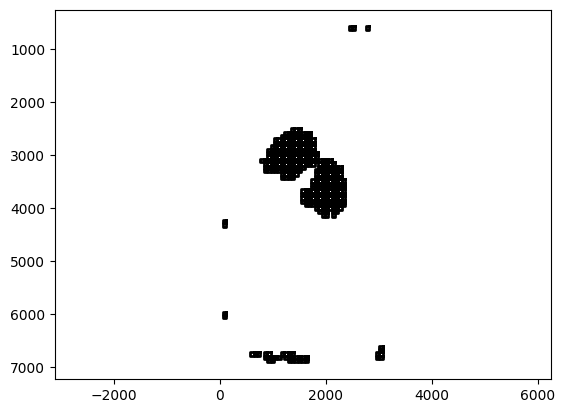

In [17]:
plot_annotations(annotations)